In [1]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [2]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [22]:
# Open image and display
original = Image.open(requests.get('https://mahamoney-english.s3.ap-south-1.amazonaws.com/pan-card-7579594-1280.png', stream=True).raw)
tampered = Image.open(requests.get('https://www.drupal.org/files/project-images/How-to-apply-for-PAN-Card-PAN-APPLICATION.png', stream=True).raw)

In [23]:
# The file format of the source file.
print("Original image format : ",original.format)
print("Tampered image format : ",tampered.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ",original.size)
print("Tampered image size : ",tampered.size)

Original image format :  PNG
Tampered image format :  PNG
Original image size :  (1280, 1280)
Tampered image size :  (497, 317)


In [24]:
# Resize Image
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering/image/original.png')#Save image
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png')#Saves image

(250, 160)
(250, 160)


In [36]:
# Change image type if required from png to jpg
tampered = Image.open('pan_card_tampering/image/tampered.png')
tampered.save('pan_card_tampering/image/tampered.png')#can do png to jpg

In [31]:
# Cell 1: Load the two input images
import cv2

original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

print("Original image shape:", original.shape)
print("Tampered image shape:", tampered.shape)

Original image shape: (160, 250, 3)
Tampered image shape: (160, 250, 3)


In [33]:
# Cell 2: Convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

# Display the shapes of grayscale images
print("Original grayscale image shape:", original_gray.shape)
print("Tampered grayscale image shape:", tampered_gray.shape)

Original grayscale image shape: (160, 250)
Tampered grayscale image shape: (160, 250)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
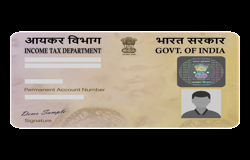

In [34]:
# Display original image
original

array([[[255, 255, 254],
        [253, 253, 251],
        [233, 232, 228],
        ...,
        [219, 185, 107],
        [223, 187, 106],
        [229, 190,  95]],

       [[255, 255, 255],
        [246, 243, 241],
        [217, 215, 211],
        ...,
        [219, 186, 105],
        [218, 186, 106],
        [223, 188,  97]],

       [[254, 253, 252],
        [233, 230, 226],
        [213, 210, 206],
        ...,
        [224, 188,  98],
        [224, 188,  98],
        [225, 188,  98]],

       ...,

       [[255, 255, 255],
        [231, 228, 240],
        [191, 186, 206],
        ...,
        [216, 174,  85],
        [216, 174,  83],
        [216, 172,  81]],

       [[255, 255, 255],
        [248, 247, 253],
        [205, 202, 219],
        ...,
        [215, 174,  87],
        [215, 174,  82],
        [215, 172,  79]],

       [[255, 255, 253],
        [255, 255, 255],
        [239, 236, 245],
        ...,
        [209, 173,  92],
        [211, 177,  80],
        [209, 174,  73]]], dtype=uint8)
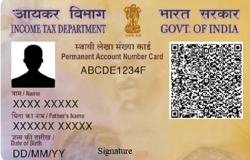

In [35]:
# Display (tampered image
tampered

Original Format Image


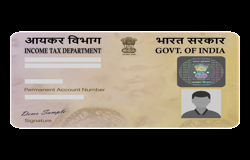

In [38]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(original)

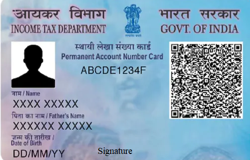

In [39]:
# Display user given image
tampered

In [44]:
# Cell 3: Compute Structural Similarity Index (SSIM) between the images
from skimage.metrics import structural_similarity

# Compute SSIM between the two grayscale images
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")

print("SSIM Score: {}".format(score))

SSIM Score: 0.09552797757055964


In [47]:
# Cell 4: Calculate threshold and contours
import imutils

# Apply threshold using Otsu's method
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Find contours
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [50]:
# Cell 5: Draw rectangles around differences
for c in cnts:
    # Get bounding box coordinates for each contour
    (x, y, w, h) = cv2.boundingRect(c)

    # Draw red rectangle on original image (BGR color format)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original Format Image with Detected Differences


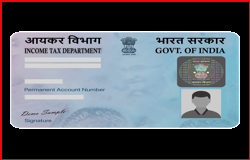

In [53]:
# Cell 6: Display original image with contours
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

print('Original Format Image with Detected Differences')

# Convert BGR to RGB for proper display
original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

# Display using PIL (alternative: plt.imshow(original_rgb))
display(Image.fromarray(original_rgb))

Original Format Image


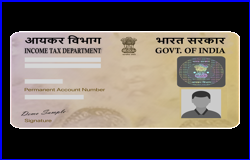

In [56]:
#(Different way)Display original image with contour
print ('Original Format Image')
Image.fromarray(original)

In [61]:
# Display tampered image with detected differences
from PIL import Image

print('Tampered Image with Detected Differences')

Tampered Image with Detected Differences


Different Image


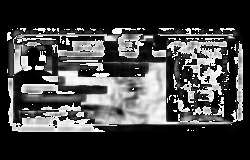

In [62]:
#(Change the way)Display image with Black
print ('Different Image')
Image.fromarray(diff)

Thershold Image


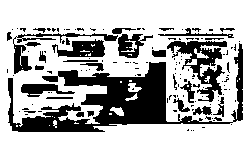

In [63]:
#(Change the another way)Display image with wihte
print ('Thershold Image')
Image.fromarray(thresh)